In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DL/eclipse.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,priority,product,resolution,short_desc,version
0,3,normal,RESOLVED,Team,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400,KM (10/2/2001 5:55:18 PM)\n\tThis PR about the...,P5,Platform,FIXED,Sync does not indicate deletion (1GIEN83),2.0
1,1,normal,CLOSED,Team,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500,- Setup a project that contains a *.gif resour...,P3,Platform,FIXED,Usability issue with external editors (1GE6IRL),2.0
2,8,normal,RESOLVED,Team,2001-10-10 21:34:00 -0400,2011-05-17 11:40:32 -0400,"With the current VCM API, a repository adapter...",P3,Platform,WONTFIX,how can we support,2.0
3,4,normal,RESOLVED,Team,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500,- become synchronized with some project in a r...,P5,Platform,FIXED,need better error message if catching up over ...,2.0
4,6,normal,RESOLVED,Team,2001-10-10 21:34:00 -0400,2002-02-07 16:29:37 -0500,IResource.setLocal has problems. This method (...,P5,Platform,INVALID,API - IResource.setLocal has problems (1G5TC8L),2.0


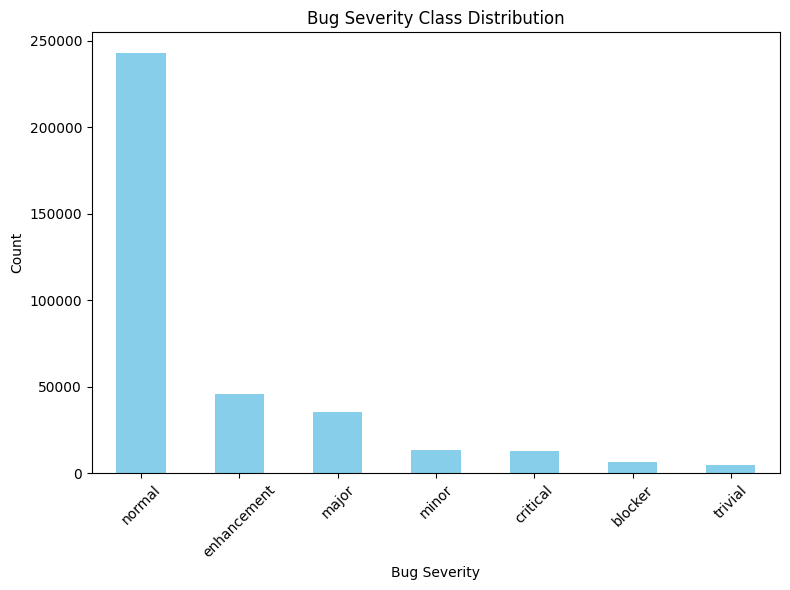

In [ ]:
severity_counts = df['bug_severity'].value_counts()

plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Bug Severity Class Distribution')
plt.xlabel('Bug Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
severity_mapping = {
    'normal': 0,
    'enhancement': 1,
    'major': 2,
    'minor': 3,
    'critical': 4,
    'blocker': 5,
    'trivial': 6
}

label_encoder = LabelEncoder()
df['bug_severity_encoded'] = label_encoder.fit_transform(df['bug_severity'].map(severity_mapping))


In [ ]:
df.drop(columns=['bug_severity'], inplace=True)

df.head()

,bug_id,bug_status,component,creation_ts,delta_ts,description,priority,product,resolution,short_desc,version,bug_severity_encoded
0,3,RESOLVED,Team,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400,KM (10/2/2001 5:55:18 PM)\n\tThis PR about the...,P5,Platform,FIXED,Sync does not indicate deletion (1GIEN83),2.0,0
1,1,CLOSED,Team,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500,- Setup a project that contains a *.gif resour...,P3,Platform,FIXED,Usability issue with external editors (1GE6IRL),2.0,0
2,8,RESOLVED,Team,2001-10-10 21:34:00 -0400,2011-05-17 11:40:32 -0400,"With the current VCM API, a repository adapter...",P3,Platform,WONTFIX,how can we support,2.0,0
3,4,RESOLVED,Team,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500,- become synchronized with some project in a r...,P5,Platform,FIXED,need better error message if catching up over ...,2.0,0
4,6,RESOLVED,Team,2001-10-10 21:34:00 -0400,2002-02-07 16:29:37 -0500,IResource.setLocal has problems. This method (...,P5,Platform,INVALID,API - IResource.setLocal has problems (1G5TC8L),2.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
df['description'].fillna('', inplace=True)

In [ ]:
empty_count = (df['description'] == '').sum()
non_empty_count = (df['description'] != '').sum()

print(f"Number of empty strings: {empty_count}")
print(f"Number of non-empty values: {non_empty_count}")

Number of empty strings: 1
Number of non-empty values: 361005


In [ ]:
X = df['description'].values
y = df['bug_severity_encoded'].values

In [ ]:
print("Count of X:", len(X))
print("Count of y:", len(y))

Count of X: 361006
Count of y: 361006


In [ ]:
print("First 5 values of X:", X[:5])
print("First 5 values of y:", y[:5])

First 5 values of X: ["KM (10/2/2001 5:55:18 PM)\n\tThis PR about the deletion indicator in the sync viewer being too subtle.\n\tThis would be even more true for someone with vision problems.\n\tNE has good suggestion of using the label of the compare text viewer.\n\tWe may also consider a better icon.\n\tOn to the PR....\n\n- delete file from project\n- synchronize\n- there is no indication that the file has been deleted from the workspace\n- it looks the same as if the file is in the workspace but is empty\n\nNOTES:\n\nKM (8/15/2001 3:37:53 PM)\n\tIt should appear as a rightfacing '-' arrow in the sync view.\n\tSent screen cap to NE requesting clarification.\n\nNE (8/20/01 9:13:38 AM)\n\tThe - in the arrow is clearer when there are other arrows present too (the + and change ones).\n\tOtherwise, it's easy to miss the distinction, especially when the user's attention is focussed\n\ton the text compare panes.\n\tI'd expect the Workspace file: label to indicate that it has been deleted.\

In [ ]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=max_len)

In [ ]:
print("Tokenized Sequences:")
for i in range(5):
    print(sequences[i])

Tokenized Sequences:
[169, 20, 1063, 60, 742, 654, 841, 21, 3547, 341, 5, 4059, 4201, 9, 5, 1146, 496, 418, 714, 21, 113, 25, 424, 137, 288, 23, 2207, 32, 390, 6638, 114, 947, 3011, 19, 111, 5, 453, 19, 5, 468, 69, 496, 72, 329, 176, 1507, 8, 940, 717, 30, 7, 5, 3547, 525, 36, 47, 49, 907, 95, 12, 85, 3591, 27, 5, 36, 114, 282, 1034, 47, 5, 115, 22, 752, 5, 171, 43, 40, 5, 36, 12, 9, 5, 115, 58, 12, 533, 1248, 218, 433, 1063, 24, 678, 1025, 841, 22, 52, 674, 43, 8, 251, 251, 1625, 9, 5, 1146, 88, 2231, 779, 9197, 7, 6638, 4946, 6638, 218, 563, 310, 299, 409, 924, 321, 5, 9, 5, 1625, 12, 44, 95, 50, 191, 5710, 1347, 714, 5, 14, 203, 1991, 1907, 404, 1689, 7, 5531, 5, 2143, 44, 5, 4320, 6563, 12, 30, 5, 69, 468, 8102, 1315, 1204, 5, 115, 36, 453, 7, 2261, 27, 22, 114, 282, 1034, 5, 286, 36, 453, 135, 21, 40, 17, 2670, 607, 44, 22, 114, 282, 1034, 47, 5, 286]
[1326, 8, 49, 27, 490, 8, 1683, 199, 481, 49, 7, 331, 463, 5, 1683, 199, 32, 46, 865, 82, 148, 333, 475, 14, 367, 865, 82, 9, 588, 

In [ ]:
sequence_lengths = [len(seq) for seq in sequences]
print("Sequence Lengths:")
print("Min Length:", min(sequence_lengths))
print("Max Length:", max(sequence_lengths))

Sequence Lengths:
Min Length: 0
Max Length: 46056


In [ ]:
print("Padded Sequences:")
for i in range(5):
    print(X[i])

Padded Sequences:
[  12  533 1248  218  433 1063   24  678 1025  841   22   52  674   43
    8  251  251 1625    9    5 1146   88 2231  779 9197    7 6638 4946
 6638  218  563  310  299  409  924  321    5    9    5 1625   12   44
   95   50  191 5710 1347  714    5   14  203 1991 1907  404 1689    7
 5531    5 2143   44    5 4320 6563   12   30    5   69  468 8102 1315
 1204    5  115   36  453    7 2261   27   22  114  282 1034    5  286
   36  453  135   21   40   17 2670  607   44   22  114  282 1034   47
    5  286]
[  79   25   27    8   42 1779   44    5  568   12 2156 1989   73 2725
  164   22    9    8  115  728   14  382  437    5  728  930  187    5
  481   21  113   25 2022  441 9071   43  145 2599  329   25 5389   23
  145   14  152  101   50   40   73  382   18    5 2599  376 6971    5
   79   26   25 7301   14   73   79  481 2857  461 1873 3457    7 1666
  342 5001  376 6971   60  867  310   13  710  645  841  125  176 1027
    6   48 4029   32    8  699  101  505   32  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
embedding_dim = 50
lstm_units = 64

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(lstm_units))
model.add(Dense(7, activation='softmax'))  # output layer with 7 neurons for 7 severity levels
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
9026/9026 [==============================] - 933s 103ms/step - loss: 0.9916 - accuracy: 0.6882 - val_loss: 0.9452 - val_accuracy: 0.6991
Epoch 2/10
9026/9026 [==============================] - 912s 101ms/step - loss: 0.9217 - accuracy: 0.7007 - val_loss: 0.9299 - val_accuracy: 0.7010
Epoch 3/10
9026/9026 [==============================] - 901s 100ms/step - loss: 0.8872 - accuracy: 0.7077 - val_loss: 0.9287 - val_accuracy: 0.7021
Epoch 4/10
9026/9026 [==============================] - 908s 101ms/step - loss: 0.8573 - accuracy: 0.7142 - val_loss: 0.9482 - val_accuracy: 0.6908
Epoch 5/10
9026/9026 [==============================] - 904s 100ms/step - loss: 0.8281 - accuracy: 0.7212 - val_loss: 0.9552 - val_accuracy: 0.6961
Epoch 6/10
9026/9026 [==============================] - 910s 101ms/step - loss: 0.7980 - accuracy: 0.7290 - val_loss: 0.9726 - val_accuracy: 0.6949
Epoch 7/10
9026/9026 [==============================] - 909s 101ms/step - loss: 0.7674 - accuracy: 0.7385 - val_

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

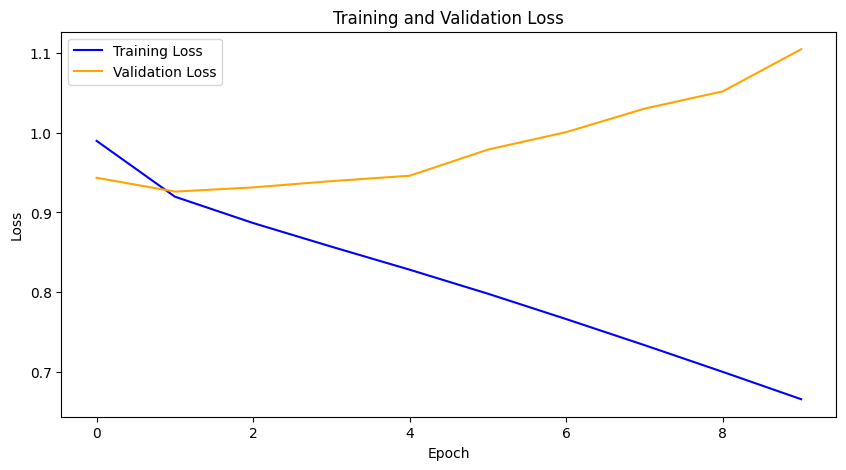

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

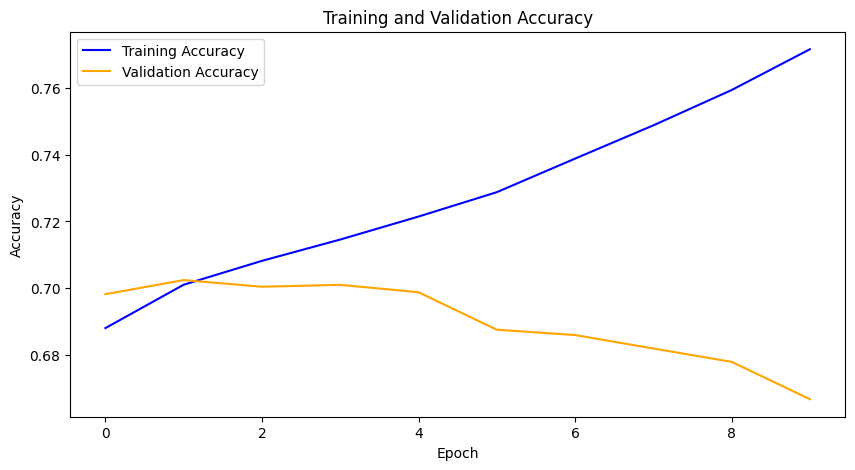

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
num_folds = 5

validation_accuracies = []

kf = KFold(n_splits=num_folds)
for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    print(f"Fold {fold}:")

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    validation_accuracies.append(val_accuracy)

    print(f"Validation Accuracy: {val_accuracy}")

mean_val_acc = np.mean(validation_accuracies)

print("Mean validation accuracy:", mean_val_acc)


Fold 1:
Validation Accuracy: 0.8004708886146545
Fold 2:
Validation Accuracy: 0.7993975281715393
Fold 3:
Validation Accuracy: 0.7984453439712524
Fold 4:
Validation Accuracy: 0.7978739738464355
Fold 5:
Validation Accuracy: 0.7992035746574402
Mean validation accuracy: 0.7990782618522644


In [ ]:
y_pred_probabilities = model.predict(X_test)

y_pred = np.argmax(y_pred_probabilities, axis=1)

for i in range(15):
    print(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")

Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 2, Predicted: 1
Actual: 2, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

2257/2257 [==============================] - 62s 27ms/step
Confusion Matrix:
[[43085  2835  1454   309   566   255   164]
 [ 4916  3922   129    44    21    11    23]
 [ 5701   216   691    51   222    76    13]
 [ 2395   150    67   113    16     6    35]
 [ 1954    69   209     9   227    72     3]
 [  880    24    91     2    86   142     2]
 [  766    68     9    34     2     3    64]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

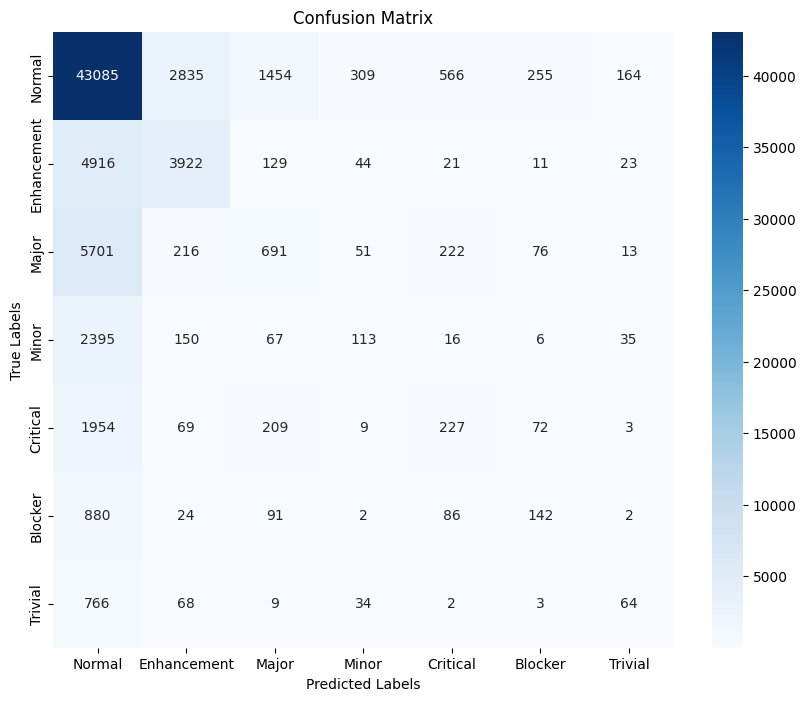

In [ ]:
class_labels = ['Normal', 'Enhancement', 'Major', 'Minor', 'Critical', 'Blocker', 'Trivial']

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80     48668
           1       0.54      0.43      0.48      9066
           2       0.26      0.10      0.14      6970
           3       0.20      0.04      0.07      2782
           4       0.20      0.09      0.12      2543
           5       0.25      0.12      0.16      1227
           6       0.21      0.07      0.10       946

    accuracy                           0.67     72202
   macro avg       0.34      0.25      0.27     72202
weighted avg       0.60      0.67      0.62     72202



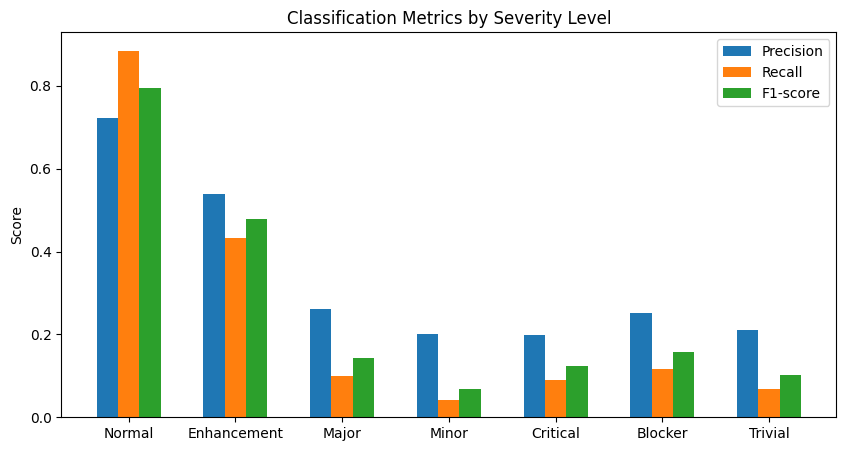

In [ ]:
num_classes = 7

classes = [str(i) for i in range(num_classes)]
precision = [class_report[c]['precision'] for c in classes]
recall = [class_report[c]['recall'] for c in classes]
f1_score = [class_report[c]['f1-score'] for c in classes]

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(classes))
width = 0.2

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Classification Metrics by Severity Level')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

In [ ]:
label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test)

print(y_test_bin[:5])

[[1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


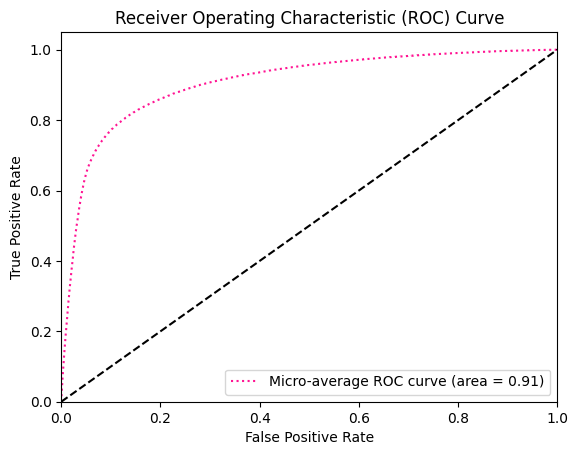

In [ ]:
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_probabilities.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure()
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro), color='deeppink', linestyle=':')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
new_bug_reports = [
  "There are two objects extra for .java and .class files in package. Each of them has another (probably bad) icon. This occurs only simetimes.",
  "Item New in menu File is not active during whole session.",
  "I installed 625 without the Math component which I don't need. The install went fine. However, when I click on any of the shortcuts for any of the apps (HTML, Drawing, Text, etc) the cursor turns to an hourglass for a few seconds and then nothing happens. The app (all of them) never comes up, neither does it crash (no Dr Warson appears or anything like that).it just doesn't open, period. Not a single one of them.",
  "I turn off all the autocorrect, but it will reset when next time startup."
]

new_sequences = tokenizer.texts_to_sequences(new_bug_reports)
print("Tokenized Sequences:", new_sequences)

new_padded = pad_sequences(new_sequences, maxlen=max_len)
print("Padded Sequences:", new_padded)

predictions = model.predict(new_padded)

predicted_labels = [list(severity_mapping.keys())[np.argmax(prediction)] for prediction in predictions]

for i, predicted_label in enumerate(predicted_labels):
    print(f"Predicted severity for '{new_bug_reports[i]}': {predicted_label}")


Tokenized Sequences: [[95, 50, 284, 1121, 1727, 23, 3, 14, 57, 142, 9, 188, 474, 19, 393, 114, 444, 967, 1468, 717, 21, 836, 134], [369, 45, 9, 235, 36, 12, 26, 703, 554, 1453, 560], [17, 534, 6326, 460, 5, 4977, 566, 101, 17, 382, 224, 5, 334, 2607, 579, 365, 44, 17, 139, 30, 190, 19, 5, 4111, 23, 190, 19, 5, 2107, 206, 5907, 69, 658, 5, 873, 4030, 7, 46, 23, 8, 1036, 1618, 14, 147, 716, 621, 5, 408, 87, 19, 393, 813, 1573, 162, 2957, 135, 22, 1616, 85, 7177, 517, 67, 1158, 160, 27, 22, 244, 338, 81, 4724, 26, 8, 798, 116, 19, 393], [17, 1673, 886, 87, 5, 58, 22, 79, 2019, 44, 429, 195, 730]]
Padded Sequences: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0